<a href="https://colab.research.google.com/github/jugernaut/Numerico2021/blob/master/01_AritmeticaPuntoFlotante/05_Redondeo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="Teal" face="Comic Sans MS,arial">
  <h1 align="center"><i>Redondeo</i></h1>
  </font>
  <font color="Black" face="Comic Sans MS,arial">
  <h5 align="center"><i>Profesor: M. en C. Miguel Angel Pérez León.</i></h5>
    <h5 align="center"><i>Ayudante: Jesús Iván Coss Calderón.</i></h5>
  <h5 align="center"><i>Materia: Análisis Numérico.</i></h5>
  </font>

## Introducción

El hecho de que en una computadora sólo un subconjunto $\mathcal{F}$ de los números reales es representable implica que, dado un número real $x$, éste debe ser aproximado por un número de punto flotante al que designaremos por $fl(x)$.


## Redondeo

El hecho de que la palabra del microprocesador sea una cadena de bits finita implica que hay valores reales que no pueden ser representados de manera exacta en un sistema de punto flotante, es por eso que una técnica para intentar dar una representación de estos valores es mediante redondeo.

La manera usual de proceder consiste en considerar el redondeo al más próximo, esto es, **$fl(x)$ es el número de punto flotante más próximo a $x$**. Tal número de punto flotante resulta del redondeado a $p$ dígitos de la mantisa correspondiente a la representación de punto flotante normalizada (infinita) de $x$. 

En caso de "empate" se redondea al número de punto flotante con el bit menos significativo igual a cero. A este tipo de redondeo se le conoce como **redondeo al par más cercano**.


### Redondeo al más cercano

Sea $x$ de la siguiente manera:

$$x=(-1)^{s}0.d_{1}d_{2}...d_{p}d_{p+1}d_{p+2}...\times\beta^{e}$$

$fl(x)$ está dada por:

$$fl(x)=(-1)^{s}0.d_{1}d_{2}...\tilde{d_{p}}\times\beta^{e},\,\,\,\,\,\,\,\,\tilde{d_{p}}=\begin{cases}
\begin{array}{c}
d_{p}\,\,\,\,si\,d_{p+1}<\beta/2\\
d_{p}+1\,\,\,\,si\,d_{p+1}\geq\beta/2
\end{array}\end{cases}$$


Esto aplica siempre y cuando $L\leq e\leq U$ y por otra parte es claro que $fl(x)=x$, si $x\in\mathcal{F}$.


Finalmente es importante notar que en un sistema de punto flotante en el cual se haga uso de alguna forma de redondeo, una misma expresión puede representar distintos valores.

### Ejemplo

Por ejemplo en el sistema $\mathcal{F}(2,3-1,2)$ estos son los valores para los cuales se tiene una representación en este sistema.

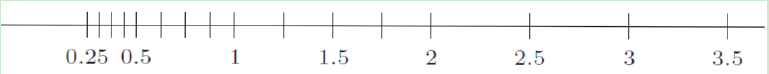

En este ejemplo y en todos los sistemas de punto flotante, sin importar la precisión, son muy pocos los valores exactos que se pueden representar en comparación con la totalidad de los valores reales. Por lo tanto todas las expresiones que no tengan asociado un valor (considerando las limitantes del sistema) **serán mapeadas a algún valor representable** (considerando las caracteristicas del redondeo).

## Errores

Para este momento es claro que los errores son un factor frecuente en todo cálculo realizado mediante un dispositivo de cómputo.

Además consideremos que el error que resulta de aproximar un número real por su forma de punto flotante se denomina **error de redondeo**.

Es por este motivo que es importante conocer las diferentes formas de medir la magnitud de un error.

Sea $fl(x)$ el número de máquina generado en el sistema $\mathcal F$ asociado al valor real $x$, tendremos 2 formas de evaluar la magnitud del error.

### Error Relativo

Esta forma de medir el error de un valor real con respeto de su aproximación considera la magnitud del valor real, y esta dada por la expresión.

$$\left|\frac{x-fl(x)}{x}\right|$$

El error relativo pone en "contexto" la magnitud del error. Una forma de pensarlo es la siguiente, sopngamos que la cantidad de ciudadanos con obesidad en un país es de $2.35\times10^{4}$ y en otro país es de $4.35\times10^{6}$, podríamos pensar que el segundo país tiene un grave problema de obesidad dadas estas cifras, sin embargo si consideramos la extensión territorial de ambos paises o la densidad poblacional podríamos llegar a conclusiones muy diferentes. 

Una estimación de cuál podría llegar a ser la magnitud del error relativo en un sistema de punto flotante, esta dada por el siguiente resultado.


#### Unidad de redondeo

Todo número real $x$ puede ser representado dentro del rango de los números de punto flotante considerando un error relativo que no excede la unidad de redondeo $u$:

$$\left|\frac{x-fl(x)}{x}\right|\leq u\equiv\frac{1}{2}\epsilon_{M}=\frac{1}{2}\beta^{1-p} \tag1$$

Este resultado es muy importante e ilustrativo ya que dados los elementos de un sistema $ \mathcal F$, (1) establece una **cota para cualquier error relativo** que se de en este sistema **si se usa redondeo** como técnica para representar valores que no puedan ser representados de manera exacta y más aun esta cota está definida en términos del $\epsilon_{M}$.

### Error Absoluto

El error absoluto únicamente considera la magnitud de la diferencia entre $x$ y su aproximaicón $fl(x)$ es decir.

$$\left|x-fl(x)\right|$$

Como consecuencia de $(1)$ podemos afirmar que toda aproximación $fl(x)$ difiere de $x$ un cierto valor menor o igual que la unidad de redondeo. En otras palabras, existe un número real $\delta$ que depende de $x$, tal que

$$fl(x)=x(1+\delta)\quad siendo\,\left|\delta\right|\leq u$$

Por otra parte, debido a que los números de punto flotante no están igualmente espaciados, es necesario tratar de encontrar una cota para el error absoluto.

El error absoluto está acotado por la siguiente expresión.

$$\left|x-fl(x)\right|\leq\frac{1}{2}\beta^{-p+e}\tag{2}$$

## Truncamiento v.s. Redondeo

Dependiendo del tipo de redondeo o truncamiento que sea empleado en un sistema $\mathcal F$ serán las cotas tanto del error relativo como del error absoluto.

En esta sección veremos como es que esas cotas cambian en función de las caracteristicas del sistema y de las técnicas empleadas para aproximar valores que no tengan una representación exacta.


### Truncamiento con p-cifras significativas base 2

Si se usan **p-cifras** significativas y **truncamiento** para la representación en número de máquina, veamos cuál es la cota del error relativo. Sea $x \in \mathbb{R}$ expresado en notación normalizada y en base $ \beta = 2$.

$$x=(0.d_{1}d_{2}...d_{p}d_{p+1}...)_{2}\times2^{e}$$

entonces:

$$\left|\frac{x-fl(x)}{x}\right|=\left|\frac{(0.d_{1}d_{2}...d_{p}d_{p+1}...)_{2}\times2^{e}-(0.d_{1}d_{2}...d_{p})_{2}\times2^{e}}{0.d_{1}d_{2}...\times2^{e}}\right|\\=\left|\frac{(0.{\overset{\underbrace{p-ceros}}{0.....0}}d_{p+1}...)_{2}\times2^{e}}{0.d_{1}d_{2}...\times2^{e}}\right|\\=\left|\frac{(0.d_{p+1}d_{p+2}...)_{2}\times2^{e-p}}{(0.d_{1}d_{2}...)_{2}\times2^{e}}\right|=\left|\frac{(0.d_{p+1}d_{p+2}...)_{2}}{(0.d_{1}d_{2}...)_{2}}\right|\times2^{-p}$$

Forzosamente $d_{1}=1$ así que el valor mínimo del denominador es 0.1 y dado que la serie $\frac{1}{2}+\frac{1}{4}+...+\frac{1}{2^{e}}=1$ cuando $e$ tiende a $\infty$. Por lo tanto.

$$\left|\frac{x-fl(x)}{x}\right|\leq\frac{1}{(0.1)_{2}}\times2^{-p}=\frac{1}{2^{-1}}\times2^{-p}=2\times2^{-p}=2^{1-p}$$

$$\therefore\left|\frac{x-fl(x)}{x}\right|\leq2^{1-p}=\epsilon_{M}$$

### Redondeo con p-cifras significativas base 2

De igual manera que sucedió con el truncamiento es importante medir que tan grande puede ser el error de redondeo. Así que considera el numero real $x$.

$$x=(0.d_{1}d_{2}...d_{p}d_{p+1}...)_{2}\times2^{e}$$


Como es frecuente, este número real puede no tener una representación exacta, así que hay que redondear al valor representable más cercano, así que considera los siguientes valores.

$$fl(x_{-})=(0.d_{1}d_{2}...d_{p})_{2}\times2^{e} \quad y \quad fl(x_{+})=([(0.d_{1}d_{2}...d_{p})+2^{-p}])_{2}\times2^{e}$$

Graficamente esto es:


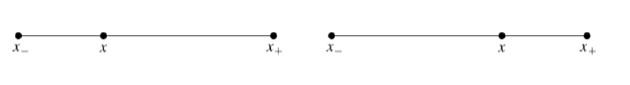

Cualquiera de los 2 casos puede darse, sin perdida de generalidad, supongamos que $x$ se ubica más cerca de $x_{-}$ que de $x_{+}$, esto es:

$$\left|x-fl(x_{-})\right|\leq\frac{1}{2}\left|fl(x_{+})-fl(x_{-})\right|$$


$$\frac{1}{2}\left|fl(x_{+})-fl(x_{-})\right|=2^{-1}\left|[(0.d_{1}..d_{p})_{2}+2^{-p}]\times2^{e}-(0.d_{1}..d_{p})_{2}\times2^{e}\right|\\ 
= 2^{-1}\left|[(0.d_{1}..d_{p})_{2}-(0.d_{1}..d_{p})_{2}+2^{-p}]\times2^{e}\right|\\ 
= 2^{-1}\left|2^{-p}\times2^{e}\right|\\ = 2^{e-p-1}$$

$$\therefore\left|x-fl(x_{-})\right|\leq\frac{1}{2} 2^{e-p}=2^{e-p-1} \tag{2}$$

Además de que (2) nos muestra el valor que acota al numerador, **tambíen da una cota para el error absoluto** si consideramos *redondeo o truncamiento con p-cifras significativas base 2*.

Continuando con la búsqueda de la cota para el error relativo cuando se emplea redondeo a p-cifras significativas, podemos notar que el numerador está acotado por (2) y el denominador esta acotado por $0.1_{2}$ (revisa los resultados previos), por lo tanto:

$$\left|\frac{x-fl(x_{-})}{x}\right|\leq\frac{2^{e-p-1}}{(0.1)_{2}\times2^{e}}\leq\frac{2^{-p-1}}{2^{-1}}=2^{-p-1+1}=\frac{1}{2}2^{1-p}=u=\frac{1}{2}\epsilon_{M}$$

¿Recuerdas quien es $\beta^{1-p}$?.

$$\therefore\left|\frac{x-fl(x)}{x}\right|\leq 2^{-p-1+1} =u=\frac{1}{2}\epsilon_{M}$$

### Truncamiento con p-cifras significativas base 10

Regresando a la representación de los números de máquina, vemos que $fl(x)$ como representación en punto flotante de x, tiene el error relativo

$$\left|\frac{x-fl(x)}{x}\right|$$

Si se usan **k-cifras** decimales significativas y **truncamiento** para la representación en número de máquina de

$$x=0.d_{1}d_{2}...d_{p}d_{p+1}...\times10^{e}$$

entonces

$$\left|\frac{x-fl(x)}{x}\right|=\left|\frac{0.d_{1}d_{2}...d_{p}d_{p+1}...\times10^{e}-0.d_{1}d_{2}...d_{p}\times10^{e}}{0.d_{1}d_{2}...d_{p}d_{p+1}\times10^{e}}\right|\\=\left|\frac{0.{\overset{\underbrace{p-ceros}}{0.....0}}d_{p+1}...\times10^{e}}{0.d_{1}d_{2}...d_{p}d_{p+1}\times10^{e}}\right|\\=\left|\frac{0.d_{p+1}d_{p+2}...\times10^{e-p}}{0.d_{1}d_{2}...\times10^{e}}\right|=\left|\frac{0.d_{p+1}d_{p+2}...}{0.d_{1}d_{2}...}\right|\times10^{-p}$$

Pero como $d_{1}\neq0$, entonces el valor mínimo del denominador es 0.1 y 1 es la cota superior del numerador, ya que $d_{p+1}=d_{p+2}=...=9$. Por lo tanto.

$$\left|\frac{x-fl(x)}{x}\right|=\left|\frac{0.99...9}{0.10...0}\right|\times10^{-p}\\
\leq \frac{1}{0.1}\times10^{-p}=\frac{1}{10^{-1}}\times10^{-p}=10\times10^{-p}=10^{1-p}$$

¿Recuerdas quien es $\beta^{1-p}$?.

$$\therefore\left|\frac{x-fl(x)}{x}\right|\leq10^{1-p}=\epsilon_{M}$$

## Resúmen

* La precisión de los cálculos realizados en una computadora están relacionados con múltiples factores, tamaño de palabra, bits para la mantisa (precisión), cifras significativas.


* Al tratar de representar valores reales en un sistema de punto flotante, tenemos 2 opciones:
    * Truncamiento.
    * Redondeo.
    
* Existen 2 formas de medir el error relacionado a un valor real $x$ y su aproximaxión $fl(x)$ en un sistema de punto flotante:
    * Error absoluto $|x-fl(x)|$

    * Error relativo $\left|\frac{x-fl(x)}{x}\right|$

* El épsilon de la máquina determina en gran medida que tan grande o pequeño sera el error al realizar un cálculo en un sistema de punto flotante.


* Si se emplea truncamiento o redondeo el error absoluto asociado a un número esta acotado por (2), es decir:

$$\left|x-fl(x)\right|\leq\frac{1}{2}\beta^{-p+e}\tag{2}$$


* Si se emplea truncamiento el error relativo asociado a un número esta acotado por el épsilon de la maquina, es decir: 

$$\left|\frac{x-fl(x)}{x}\right|\leq\epsilon_{M}$$

*  Por otra parte si se emplea redondeo al mas cercano, el error relativo asociado a la representación de un valor en un sistema de punto flotante, es la mitad de la cota del error relativo empleando truncamiento, es decir:

$$\left|\frac{x-fl(x)}{x}\right|\leq\frac{1}{2}\epsilon_{M}=u \tag{1}$$

## Sección Especial


* Intenta encontrar la cota del error relativo de un sistema en base 10 y que emplea redondeo con k-cifras significativas.


* Identifica cual es la cota del error relativo para un sistema que este basado en precisión simple.

<font color="red" face="Comic Sans MS,arial">
  <h1 align="left"><i>Te conviene averiguarlo antes del examen</i></h1>
  </font>

## Referencias

1. Riswan Butt: Numerical Analysys Using Matlab, Jones and Bartlett.
2. Ward Cheney, David Kincaid: Métodos Numéricos y Computación, Cenage Learning.
3. Richard L. Burden, J. Douglas Faires: Análisis Numérico, Math Learning.
4.   https://www.famaf.unc.edu.ar/~vmarconi/fiscomp/representacion-numeros.pdf
5.   http://numerico.fcaglp.unlp.edu.ar/textos/tp1/numerico1-01b.pdf